# Music Genre Classification Using KNN

### Team Members:
### 1. Pravin Raj A K
### 2. Sai Sangavi C
### 3. Sai Varsha R
### 4. Shreya Sanghamitra

### Abstract :

Using GTZAN dataset of 1000 audio file we have done a audio processing model with KNN classifier to distinguish the genre (disco,hip-hop,pop,etc.) of a audio file given. KNN simply uses the distance-based method to find the K number of similar neigbhours to a new data and the class in which the majority of neighbours lies, it results in that class as an output. 

### Implementation :
Importing the required libraries

In [294]:
#used to extract the audio feature MFCC
from python_speech_features import mfcc  

#used to handle the wav format audio file
from scipy.io import wavfile as wav  

#used to working with arrays and other few operations in the data
import numpy as np

#used for working with directory
import os

#used to working with the object structure
import pickle

#used to generate random values
import random 

#used to working with functions 
import operator

#used to working withn math operations
import math

#used to calculate the accuracy and 
#to generate the confusion matrix of the model to check how well it performed
from sklearn.metrics import confusion_matrix,accuracy_score

#used for plotting
import seaborn as sns
import matplotlib.pyplot as plt

### Feature Extraction and Pre - Processing the Data

Intially we are describing our data path

In [100]:
directory = r'C:\Users\Pravin\Downloads\Compressed\archive_3\Data\genres_original'

Here, we are extracting the MFCC (Mel-frequency cepstral coefficients) feature for all the audio file in the GTZAN dataset were it helps us to get the all important feature of that audio file in the form of MFCC. Using python speech feature library we can extract the MFCC were this will divide our audio into small - small frames . After dividing into frames it will extract different frequencies from each frame .

In [ ]:
 #creating a dat file to store our extracted feature
f = open("my.dat", "wb")

i = 0

#Accessing all the folder in our directory
for folder in os.listdir(directory): 
    
    i += 1
    
    if i == 11:
        
        break
        
    #Accessing all the audio file the particular folder to extract its feature
    for file in os.listdir(directory+"\\"+folder):
        
        try:
            
            (rate, sig) = wav.read(directory+"/"+folder+"/"+file)
            
            #extracting the MFCC feature from the audio file loaded
            
            mfcc_feat = mfcc(sig, rate, winlen = 0.020, appendEnergy=False)
            
            covariance = np.cov(np.matrix.transpose(mfcc_feat))
            
            mean_matrix = mfcc_feat.mean(0)
            
            feature = (mean_matrix, covariance, i)
            
            #dumping the extracted feature in the dat file
            pickle.dump(feature, f)
            
        except Exception as e:
            print("Got an exception: ", e, 'in folder: ', folder, ' filename: ', file)
f.close()

### Splitting the dataset into train and test

In [260]:
dataset = []

def loadDataset(filename, split, trset, teset):
    
    with open('my.dat','rb') as f:
        
        while True:
            
            try:
                
                dataset.append(pickle.load(f))
                
            except EOFError:
                
                f.close()
                
                break
                
    for x in range(len(dataset)):
        
        if random.random() < split:
            
            trset.append(dataset[x])
            
        else:
            
            teset.append(dataset[x])

trainingSet = []

testSet = []

#calling the function loaddataset to split the data
#inside the function we pass the dataset file , spltting percentage, 
#train and test list to store the spllited data
loadDataset('my.dat', 0.81 , trainingSet, testSet)

np.shape(trainingSet),np.shape(testSet)


((805, 3), (194, 3))

### KNN Classifier 

Here we have created a function called getNeighbors were it will find the distance of a data point with every other point in training data and then we find all the nearest K neighbours and return all neighbours.



In [261]:
#function to get distance between feature vectors and find neighbors

def getNeighbors(trainingset, instance, k):
    
    distances = []
    
    for x in range(len(trainingset)):
        
        dist = distance(trainingset[x], instance, k) + distance(instance,trainingset[x],k)
        
        distances.append((trainingset[x][2], dist))
        
    distances.sort(key=operator.itemgetter(1))
    
    neighbors = []
    
    for x in range(k):
        
        neighbors.append(distances[x][0])
        
    return neighbors

Here we have a function called distance which will calculate the distance between the two points and return it to the function getNeighbors

In [262]:
#function to calculate the distance 

def distance(instance1, instance2, k):
    
    distance = 0
    
    mm1 = instance1[0]
    
    cm1 = instance1[1]
    
    mm2 = instance2[0]
    
    cm2 = instance2[1]
    
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1))
    
    distance += (np.dot(np.dot((mm2-mm1).transpose(), np.linalg.inv(cm2)), mm2-mm1))
    
    distance += np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    
    distance -= k
    
    return distance

After finding the list of k neighbours from getNeighbors funtion, we need to findout a class that has the maximum neighbors count. So, we declare a fucntion nearestclass which will create a dictionary that will store the class and its respective count of neighbours. After creating the frequency map we sort the map in descending order based on neighbours count and return the first class.

In [263]:
#function to identify the class

def nearestclass(neighbors):
    
    classVote = {}
    
    for x in range(len(neighbors)):
        
        response = neighbors[x]
        
        if response in classVote:
            
            classVote[response] += 1
            
        else:
            
            classVote[response] = 1
            
    sorter = sorted(classVote.items(), key=operator.itemgetter(1), reverse=True)
    
    return sorter[0][0]

### Testing Our Model

In [266]:
#Prediction the test data using KNN and 
#then we are storing the predicted classes 

length = len(testSet)

predictions = []

for x in range(length):
    
    predictions.append(nearestclass(getNeighbors(trainingSet, testSet[x], 5)))

### Evaluating our model

In [287]:
#Extracting the true labels of the test data
true_labels=[]

for i in range(len(testSet)):
    
    true_labels.append(testSet[i][-1])
    
#calculating the accuracy 

acc = '{0:.4g}'.format(accuracy_score(true_labels,predictions)*100)

print(f'Accuracy of our model : {acc} %')

Accuracy of our model : 74.74 %


Labels of each class

1 = blues
2 = classical
3 = country
4 = disco
5 = hiphop
6 = jazz
7 = metal
8 = pop
9 = reggae
10 = rock


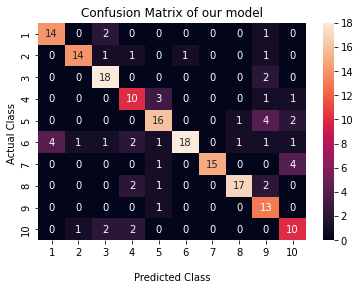

From the test audio collection of 194, our KNN model predicted 145 music genre correctly


In [311]:
print('Labels of each class\n')

label=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

for i in range(1,11):
    
    print(i,'=',label[i-1])
    
#confusion matrix 

cm = confusion_matrix(true_labels, predictions)

ax = sns.heatmap(cm, annot=True)

ax.set_title('Confusion Matrix of our model')

ax.set_xlabel('\nPredicted Class')

ax.set_ylabel('Actual Class ')

ax.xaxis.set_ticklabels(set(true_labels))

ax.yaxis.set_ticklabels(set(true_labels))

plt.show()

true_p=np.trace(cm)

l_t=len(true_labels)

print(f'From the test audio collection of {l_t}, our KNN model predicted {true_p} music genre correctly')